# Primary Imports

In [1]:
import pandas as pd # Data Prperocessing and Data Wrangling
import numpy as np # Data Wrangling and Data transfomations
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import re #Regular Expression
import nltk # Natural Language Tool Kit
from nltk.corpus import stopwords # Stopwords
nltk.download('stopwords') # Stopwords
from nltk.stem import WordNetLemmatizer # Lemitaization
nltk.download('wordnet')
from sklearn.decomposition import PCA # Principle Component Analysis for Dimensionality Reduction

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Import

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anthdm/ml-email-clustering/master/split_emails.csv') 

Eye Balling the dataset

In [3]:
df.head()

,Unnamed: 0,file,message
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   file        10000 non-null  object
 2   message     10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [6]:
print(df['message'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [7]:
df['message'][0]

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

Data preprocessing

In [8]:
corpus = []
for i in df['message']:
  c = ''.join(i.split('X-FileName:')[-1].split('\n\n')[1:]).replace('\n', '')
  #if('To:' in c):
  corpus.append(c)
  #corpus.append(i.split('\n\n')[-2])
#  if(i.split('\n\n')[-1] == ''):
#    corpus.append(i.split('\n\n')[-2])
#  else:
#    corpus.append(i.split('\n\n')[-1])


In [53]:
df['corpus'] = corpus

In [55]:
df['corpus'].head()

0                                Here is our forecast 
1    Traveling to have a business meeting takes the...
2                        test successful. way to go!!!
3    Randy, Can you send me a schedule of the salar...
4                   Let's shoot for Tuesday at 11:45. 
Name: corpus, dtype: object

Removing unnecessary white spaces and redundant emails from the dataset

In [13]:
c = set([])
for i in range(df['corpus'].shape[0]):
  df['corpus'][i] = re.sub(' +', ' ', df['corpus'][i])
  c.add(df['corpus'][i])
print(df['corpus'].shape)
print(len(c))  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(10000,)
5222


Out of 10000 emails only 5225 emails are unique, let's pick them up

In [15]:

a = [] 
removeable_index = []
for i in range(df['corpus'].shape[0]):
  x = df['corpus'][i]
  x = re.sub(' +', ' ', x)
  if(x not in a):
    a.append(x)
  else:
    removeable_index.append(i)

Removing Duplicate Emails

In [16]:
df.drop(removeable_index, axis = 0, inplace = True)

In [17]:
df.reset_index(drop=True,inplace = True)

Pre-processing the data for NLP

In [18]:
lem = WordNetLemmatizer()
clean_corpus = []

# This is an iterative step, I've run this notebook before and noticed that few not so important words are not filtered by the stopwords
# So i'm hard coding them into the machine
c = set(['com','sent','etc','ectcc','cc','bcc', 'message','subject','www','forward','th','hou','http','please','regards','thanks','ect','id','ee',
'eb','pm','ees','na'])
sw = set(stopwords.words('english')).union(c)

for i in df['corpus']:
  c = re.sub('[^A-Z,a-z]',' ',i).lower().strip().split()
  c = [lem.lemmatize(i) for i in c if i not in sw]
  clean_corpus.append(' '.join(c))

Pre-processed Corpus
---

Lemmatized each word using Wordnet Lementizer (Only the symantic root of a word is restored to reduce redundancy in the sparse matrix to be created in the further steps)

Removed the stop words using nltk.stopwords




In [19]:
clean_corpus[0:5]

['forecast',
 'traveling business meeting take fun trip especially prepare presentation would suggest holding business plan meeting take trip without formal business meeting would even try get honest opinion whether trip even desired necessary far business meetings, think would productive try stimulate discussion across different group working often presenter speaks others quiet waiting turn meeting might better held round table discussion format suggestion go austin play golf rent ski boat jet ski flying somewhere take much time',
 'test successful way go',
 'randy, send schedule salary level everyone scheduling group plus thought change need made patti example phillip',
 'let shoot tuesday']

In [20]:
df['clean_corpus'] = clean_corpus

Final Dataset 

In [21]:
df.head()

,Unnamed: 0,file,message,corpus,clean_corpus
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast,forecast
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,test successful way go
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the salar...","randy, send schedule salary level everyone sch..."
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,let shoot tuesday


Creating the BOW model using TfidfVectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tf_idf = TfidfVectorizer(max_df = 0.5,min_df = 2)

In [24]:
vecs = tf_idf.fit_transform(clean_corpus).toarray()

In [25]:
print("Shape of the Bag of Words model created", vecs.shape)

Shape of the Bag of Words model created (5222, 24640)


The BOW model created is a pretty sparse matrix, with it-idf scores populated in it. For every word in every email(document)


---



The matrix's dimensions are as follows:

N-rows = No of emails in the dataset

N-cols = No of words identified by tf-idf vectorizer



---


In [26]:
len(tf_idf.get_feature_names()) == vecs.shape[1]

True

Extracting the features with the highest TF-idf scores

In [27]:
top_fetaures = pd.DataFrame([tf_idf.get_feature_names(), vecs.sum(axis = 0).tolist()], index = ['Words','TF-iDF score']).T

In [28]:
top_fetaures = top_fetaures.sort_values(by = 'TF-iDF score', ascending = False).reset_index(drop = True)

In [29]:
first_50_words = top_fetaures.iloc[0:50,:]
second_50_words = top_fetaures.iloc[51:100,:]
third_50_words = top_fetaures.iloc[101:150,:]

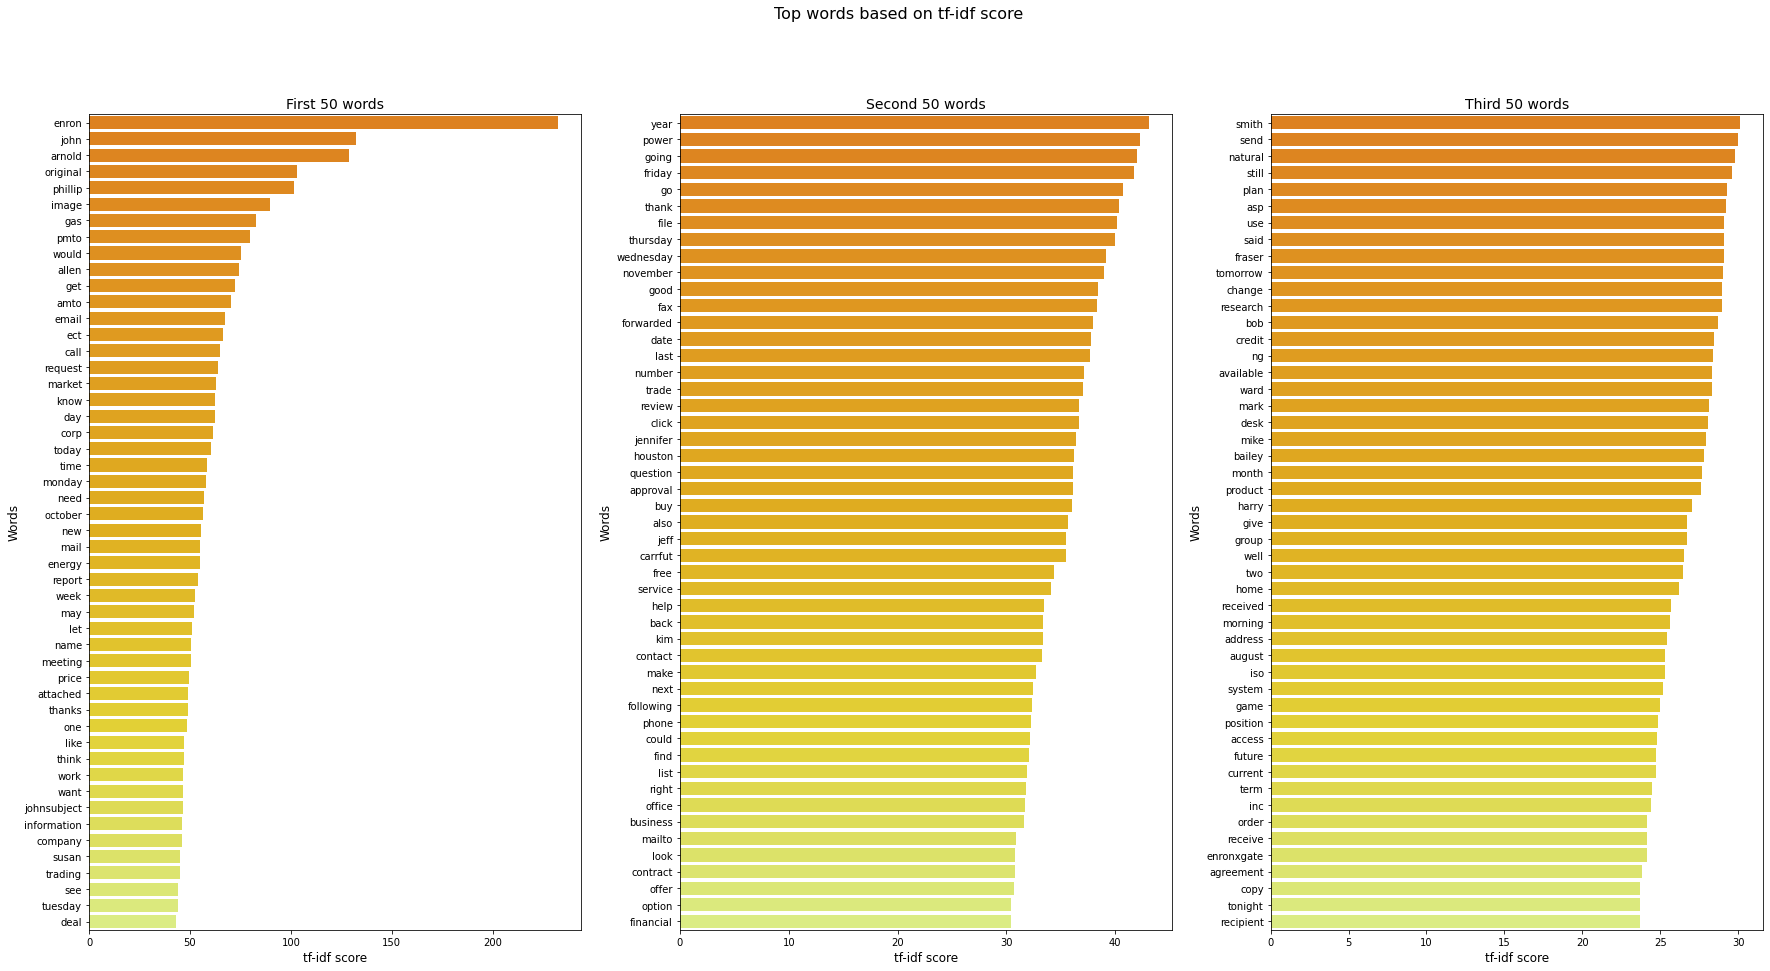

In [30]:
f, axes = plt.subplots(1, 3, figsize=(30,15))
f.suptitle("Top words based on tf-idf score", fontsize=16)
axes[0].set_title("First 50 words", fontsize=14)
sns.barplot(y= first_50_words['Words'], x= first_50_words['TF-iDF score'], orient='h' , ax=axes[0], palette= 'Wistia_r')
axes[0].set_xlabel('tf-idf score', fontsize=12)
axes[0].set_ylabel('Words', fontsize=12)
axes[1].set_title("Second 50 words", fontsize=14)
sns.barplot(y= second_50_words['Words'], x= second_50_words['TF-iDF score'], orient='h' , ax=axes[1], palette= 'Wistia_r')
axes[1].set_xlabel('tf-idf score', fontsize=12)
axes[1].set_ylabel('Words', fontsize=12)
axes[2].set_title("Third 50 words", fontsize=14)
sns.barplot(x=third_50_words['TF-iDF score'], y= third_50_words['Words'], orient='h' , ax=axes[2],palette= 'Wistia_r')
axes[2].set_xlabel('tf-idf score', fontsize=12)
axes[2].set_ylabel('Words', fontsize=12)
plt.show()

# Checking the spread of the words in the emails, Using Principle Component Analysis.


In [31]:
pca = PCA(n_components= 2)

In [32]:
model = pca.fit(vecs)
coords = pca.transform(vecs) 

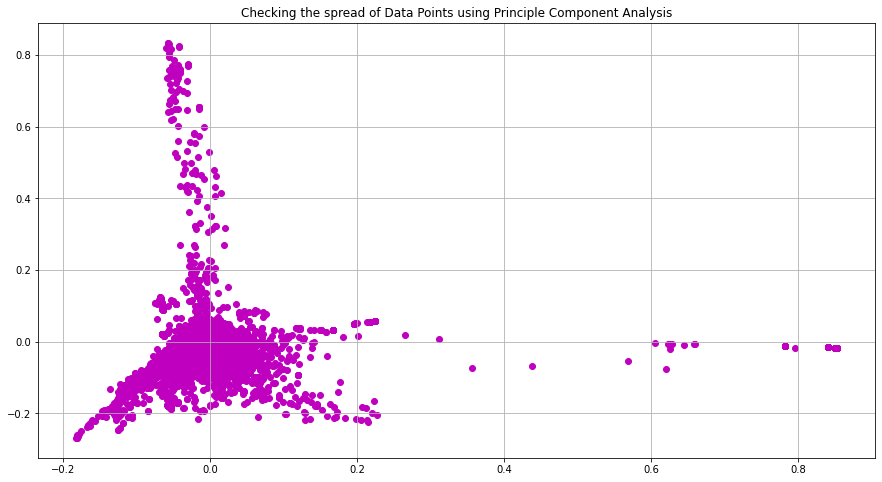

In [33]:
# Checking the spread of the data
plt.figure(figsize = (15,8))
plt.title("Checking the spread of Data Points using Principle Component Analysis")
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.grid()
plt.show()



---
# Clustering the BOW model to get email clusters. 

    Every row in the Bow model is a vector, 
    Thus what I've done here is i've projected the emails to vectors 
    and vectors are clustered. 

    Once we derive the clusters using K-means, 
    I will reproject the predictions on the emails again to derive email clusters. 
---





In [34]:
from sklearn.cluster import KMeans

In [35]:
km = KMeans(n_clusters = 3, init = 'k-means++')

In [36]:
CLUSTERS = km.fit_predict(vecs) # DERIVING THE CLUSTERS

In [37]:
final_df =np.column_stack((vecs,CLUSTERS))

In [70]:
C = tf_idf.get_feature_names()
C.append('Clusters')
final_df = pd.DataFrame(final_df, columns = C)

In [39]:
final_df.drop(['ect','ce','cd','do','ng','via','web','ou','ees'] , axis = 1, inplace = True)

In [40]:
# Visualize the clusters here



---
####Spliting the dataset cluster-wise
---





In [41]:
df_c1 = final_df[final_df['Clusters']==0.0]
df_c2 = final_df[final_df['Clusters']==1.0]
df_c3 = final_df[final_df['Clusters']==2.0]


---
#### Extracting the top 30 words in each cluster and visualizing them
---

In [42]:
top_30_in_cluster_1 = df_c1.sum(axis = 0).sort_values(ascending = False).head(31)[1:]
top_30_in_cluster_2 = df_c2.sum(axis = 0).sort_values(ascending = False).head(31)[1:]
top_30_in_cluster_3 = df_c3.sum(axis = 0).sort_values(ascending = False).head(31)[1:]

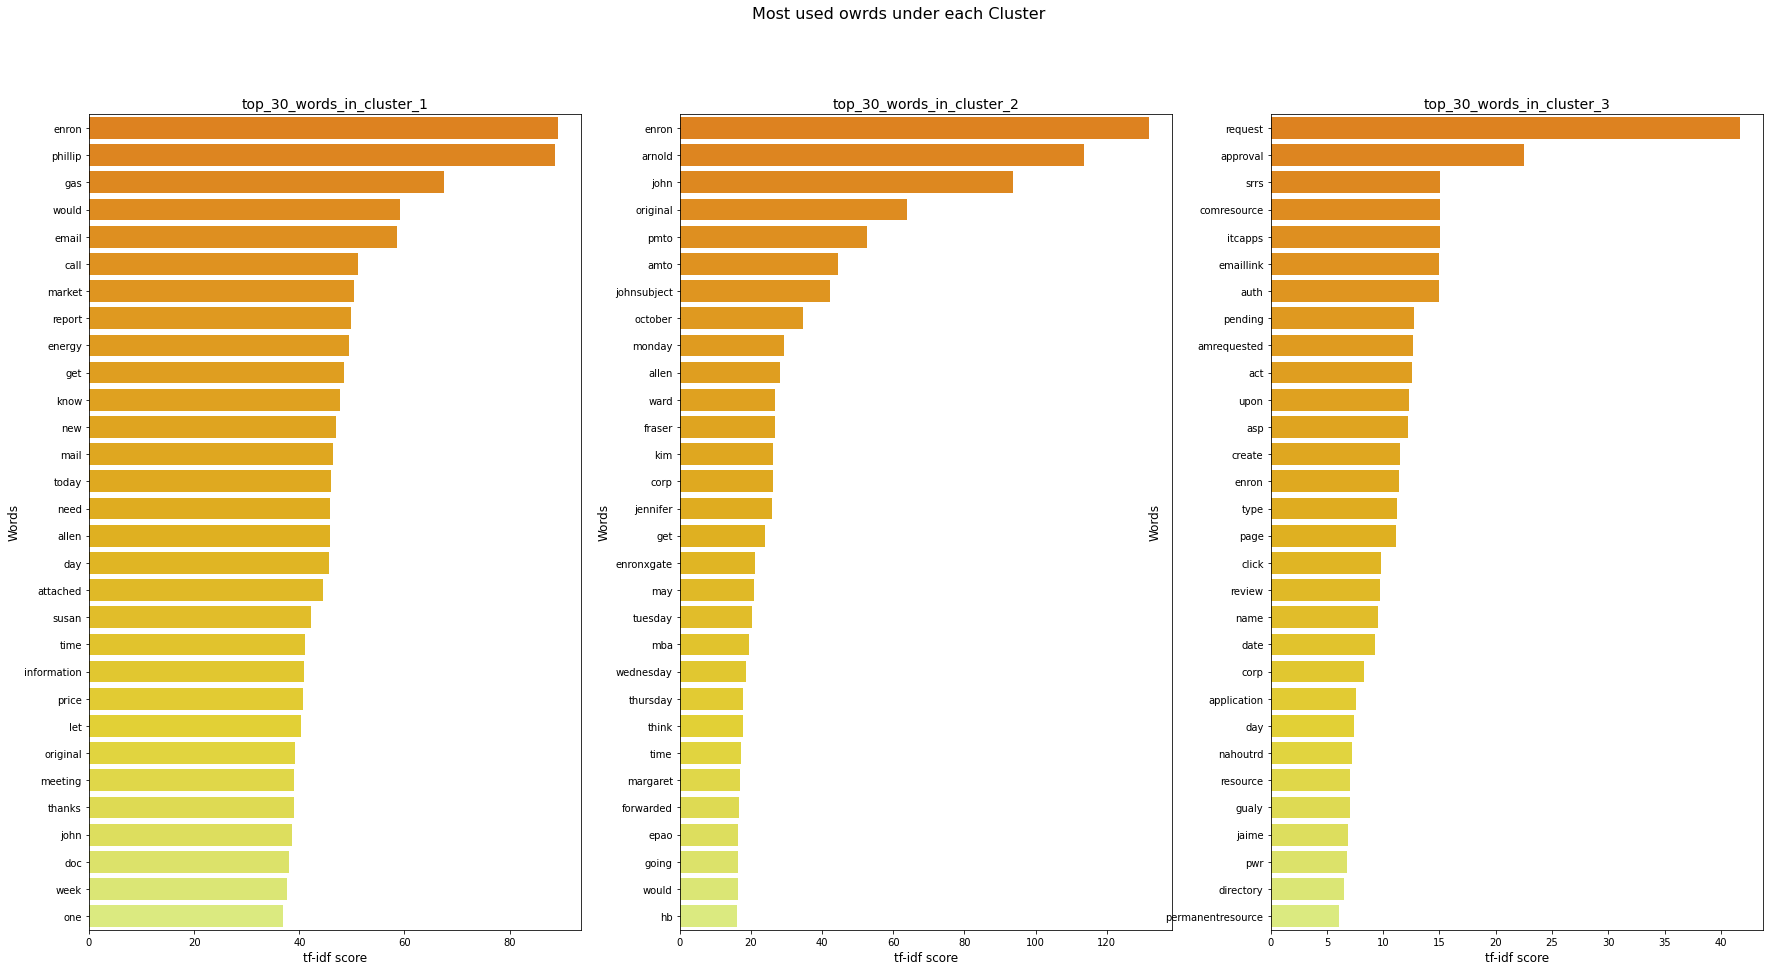

In [43]:
f, axes = plt.subplots(1, 3, figsize=(30,15))
f.suptitle("Most used owrds under each Cluster", fontsize=16)
axes[0].set_title("top_30_words_in_cluster_1", fontsize=14)
sns.barplot(y=top_30_in_cluster_1.index, x= top_30_in_cluster_1, orient='h' , ax=axes[0], palette= 'Wistia_r')
axes[0].set_xlabel('tf-idf score', fontsize=12)
axes[0].set_ylabel('Words', fontsize=12)
axes[1].set_title("top_30_words_in_cluster_2", fontsize=14)
sns.barplot(y=top_30_in_cluster_2.index, x= top_30_in_cluster_2, orient='h' , ax=axes[1], palette= 'Wistia_r')
axes[1].set_xlabel('tf-idf score', fontsize=12)
axes[1].set_ylabel('Words', fontsize=12)
axes[2].set_title("top_30_words_in_cluster_3", fontsize=14)
sns.barplot(y=top_30_in_cluster_3.index, x= top_30_in_cluster_3, orient='h' , ax=axes[2],palette= 'Wistia_r')
axes[2].set_xlabel('tf-idf score', fontsize=12)
axes[2].set_ylabel('Words', fontsize=12)
plt.show()

In [60]:
# Inferences 
# Cluster one - We can see the names of companies, and words like stock, trademark, news etc. Form these words I claim these emails are 
# where discuss about market and generic market related emails

#Cluster two - We can see a nemaes like enron, email, day, call, information etc. From these words I claim 
# these emails are offical emails internal to enron

# Cluster three -  this could be generic emails like birthday wish/ level request/approvals
# from HR team.
# Not very business oriented emails

##### Implementing Cosine Similarity for find relationships between a highly used word Vs Emails

    From prior work on this notebook i know, 
    everything that exits the tf_ifd vectorizer is a vector (So is the nomenclature :D),

    So i've used the tf_idf object trained on the email corpus, 
    to transform a word from the top words under a cluster.

    The result is again a vector.

    By finding the cosine-simillarity score between a 
    "selected word's vectors Vs a email in the vector format" 
    gives the relationship between the word and the email.

    Using this logic I'm gathereing the top 10 related emails for a 
    top used word and prompting it.





In [84]:
# The corpus need to be hard cleaned again to get rid of words like www, com, subject etc which are genric email terms.

# Let's see what cosine similarity logic has to say for the word "paribas" 

def Gimmi_to_n_similary_mails(x,n):
  v_query = tf_idf.transform([x])

  from sklearn.metrics.pairwise import linear_kernel
  cosine_sim = linear_kernel(v_query, vecs).flatten()
  
  related_email_indices = cosine_sim.argsort()[:-n:-1]

  for i in related_email_indices:
    print("Email ::", df['corpus'][i], '\n\n',"Cluster of the email",final_df['Clusters'][i])
    print("==============================================================================================")

In [85]:
Gimmi_to_n_similary_mails('market',10)

Email :: real time market 

 Cluster of the email 0.0
Email :: Market Participants,Attention: Settlements and Scheduling PersonnelYour participation is requested in the second iteration of 10-MinuteSettlement Market Simulation.As communicated on 7/20/00, the ISO has postponed the August 1, 2000,implementation of 10-minute settlements in order to accommodate additionalend-to-end testing and market simulation. The ISO's new target forimplementation is the last week of August, 2000, contingent upon thesuccessful completion of the second 10-Minute Settlement Market Simulationand ISO's 10 day written notice to FERC.The second 10-Minute Settlement Market Simulation is scheduled to begin onTuesday, August 1, 2000. The ISO will hold a kickoff meeting conferencecall on Thursday, July 27, from 1:30 - 3:00 p.m., to summarize the status ofthe first Market Simulation, discuss the second Market Simulation logistics,and review the Market Simulation Plan.All Market Participants are strongly urged to p

In [86]:
Gimmi_to_n_similary_mails('approval', 15) # Here one can very well see the word approval's context with respect to first and second cluster

Email :: you have my approval 

 Cluster of the email 0.0
Email :: This request has been pending your approval for 2 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000009659&Page=Approval to review and act upon this request.Request ID : 000000000009659Request Create Date : 12/8/00 8:23:47 AMRequested For : barry.tycholiz@enron.comResource Name : VPNResource Type : Applications 

 Cluster of the email 2.0
Email :: This request has been pending your approval for 11 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000067320&Page=Approval to review and act upon this request.Request ID : 000000000067320Request Create Date : 10/11/01 10:24:53 AMRequested For : matt.smith@enron.comResource Name : Risk Acceptance Forms Local Admin Rights - PermanentResource Type : Applications 

 Cluster of the email 2.0
Email :: This request has been pending your approval for 52 days. Please click http://itcapps.corp.enron.com/srrs/auth/email

### This Email clustering would've worked better if there were lesser typos in the email.
### People should proof read their email religiously.
### With that note this notebook ends and Lots to come.